## CMPINF 2100 Week 10 | Fitting Multiple Regression Models

Fit different linear models to the NON-LINEAR relationship data

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

### Read Data

In [2]:
df = pd.read_csv('week_10_nonlinear_data.csv')

In [3]:
df

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.000000,0.567520,0.905523,0.25,-2.25,0.33
1,-2.571429,1.464483,0.892371,0.25,-2.25,0.33
2,-2.142857,2.141771,2.112304,0.25,-2.25,0.33
3,-1.714286,2.476877,2.115940,0.25,-2.25,0.33
4,-1.285714,2.409187,2.515115,0.25,-2.25,0.33
5,-0.857143,1.950945,1.586887,0.25,-2.25,0.33
6,-0.428571,1.185037,0.928959,0.25,-2.25,0.33
7,0.000000,0.250000,0.141207,0.25,-2.25,0.33
8,0.428571,-0.685037,-1.163743,0.25,-2.25,0.33
9,0.857143,-1.450945,-1.098146,0.25,-2.25,0.33


Let's pretend we **DO NOT** know the REAL relationship between the input and the TREND!

So let's pretend this is a REAL APPLICATION!

In [4]:
df_train = df.loc[:, ['x', 'y']].copy()

In [5]:
df_train

,x,y
0,-3.000000,0.905523
1,-2.571429,0.892371
2,-2.142857,2.112304
3,-1.714286,2.115940
4,-1.285714,2.515115
5,-0.857143,1.586887
6,-0.428571,0.928959
7,0.000000,0.141207
8,0.428571,-1.163743
9,0.857143,-1.098146


### Fit Linear Models

We need to decide the KIND of relationships or **FEATURES** to use to predict the TREND (average output) using the INPUTS.

The SIMPLIEST POSSIBLE linear model.... is an UNKNOWN CONSTANT AVERAGE or INCERCEPT ONLY model!

Let's fit this simplest model.

In [7]:
mod_00 = smf.ols(formula='y~1', data=df_train).fit()

In [8]:
mod_00.params

Intercept    0.098301
dtype: float64

In [9]:
mod_00.bse

Intercept    0.420567
dtype: float64

In [10]:
mod_00.conf_int().\
rename(columns={0: 'ci_lwr', 1: 'ci_upr'})

,ci_lwr,ci_upr
Intercept,-0.803726,1.000328


In [11]:
def my_coefplot( mod, figsize_use=(10, 4)):
    fig, ax = plt.subplots(figsize=figsize_use)

    ax.errorbar( y=mod.params.index,
                 x=mod.params,
                 xerr = 2 * mod.bse,
                 fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)

    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')

    ax.set_xlabel('coefficient value')

    plt.show()

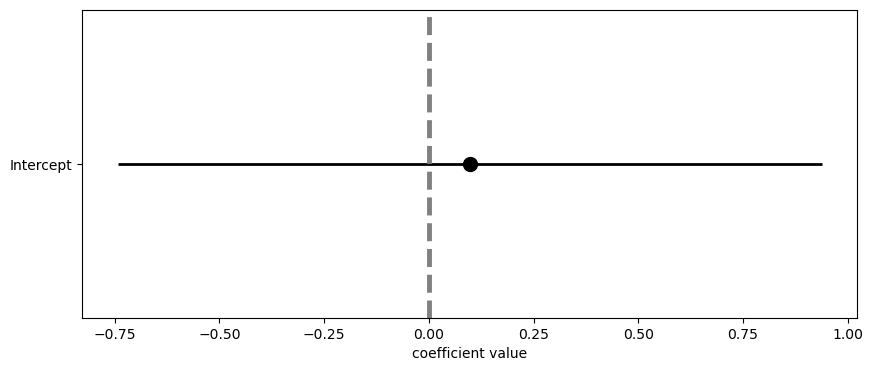

In [13]:
my_coefplot( mod_00 )

In [14]:
mod_00.rsquared

0.0

In [15]:
mod_00.resid

0     0.807222
1     0.794071
2     2.014003
3     2.017639
4     2.416814
5     1.488586
6     0.830658
7     0.042906
8    -1.262044
9    -1.196447
10   -2.074284
11   -2.499558
12   -1.803662
13   -1.464928
14   -0.110976
dtype: float64

In [19]:
np.sqrt( (mod_00.resid ** 2).mean() )

1.5736190458159056

The question becomes... can we DO BETTER than the INCERPECT ONLY MODEL!?

Let's start with the linear relationship or the classic best fit line!

In [22]:
mod_01 = smf.ols(formula='y~x', data=df_train).fit()

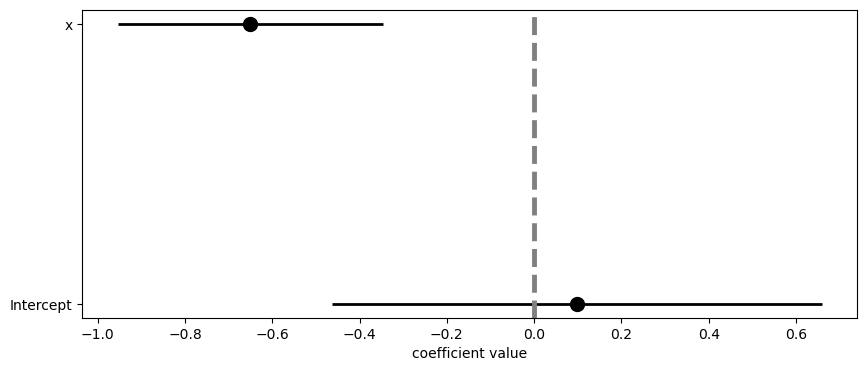

In [23]:
my_coefplot( mod_01 )

In [24]:
mod_01.pvalues < 0.05

Intercept    False
x             True
dtype: bool

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


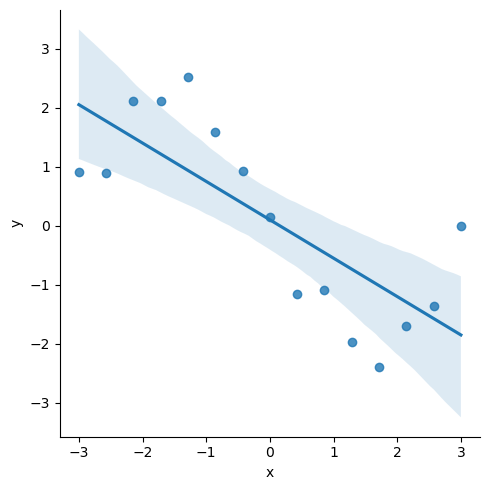

In [26]:
sns.lmplot(data=df_train, x='x', y='y' )

plt.show()

In [27]:
mod_01.rsquared

0.5860983726427409

In [28]:
mod_01.rsquared > mod_00.rsquared

True

In [30]:
np.sqrt( (mod_01.resid ** 2).mean() )

1.012390754233682

In [32]:
np.sqrt( (mod_01.resid ** 2).mean() ) > np.sqrt( (mod_00.resid ** 2).mean() )

False

In [33]:
print( mod_01.summary() )

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     18.41
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           0.000879
Time:                        14:44:11   Log-Likelihood:                -21.469
No. Observations:                  15   AIC:                             46.94
Df Residuals:                      13   BIC:                             48.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0983      0.281      0.350      0.7

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [34]:
np.sqrt( (mod_01.resid ** 2).mean() ) < np.sqrt( (mod_00.resid ** 2).mean() )

True

We can also try a QUADRATIC or 2nd degree polynomial model!

In [35]:
mod_02 = smf.ols(formula='y ~ x + np.power(x, 2)', data=df_train).fit()

In [36]:
mod_02.params

Intercept         0.047021
x                -0.650621
np.power(x, 2)    0.014957
dtype: float64

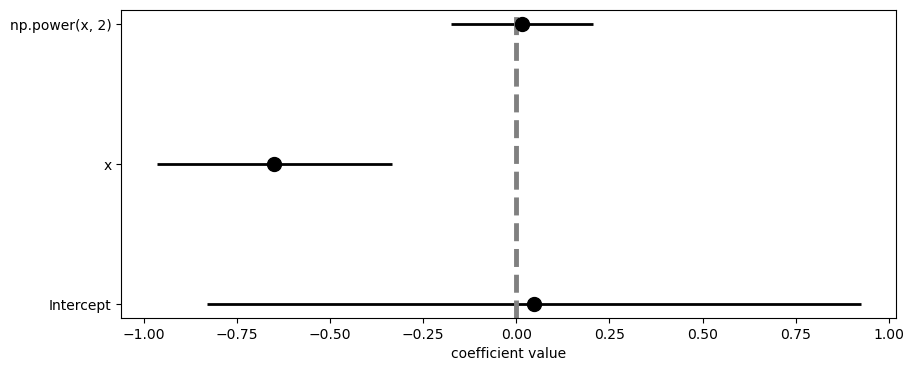

In [37]:
my_coefplot( mod_02 )

In [38]:
mod_02.rsquared

0.5869365534260478

In [39]:
mod_01.rsquared

0.5860983726427409

But we can also use a CUBIC relationship!

In [40]:
mod_03 = smf.ols(formula='y ~ x + np.power(x, 2) + np.power(x, 3)', data=df_train).fit()

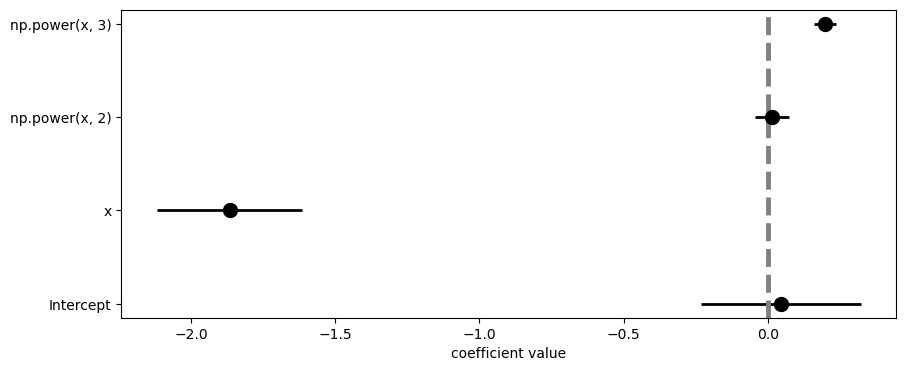

In [41]:
my_coefplot( mod_03 )

In [42]:
mod_03.rsquared

0.9622808922386508

In [43]:
mod_03.rsquared > mod_01.rsquared

True

In [46]:
np.sqrt( (mod_03.resid ** 2).mean() ) < np.sqrt( (mod_01.resid ** 2).mean() )

True

In [47]:
np.sqrt( (mod_03.resid ** 2).mean() ) 

0.3056189707611959

In [48]:
np.sqrt( (mod_01.resid ** 2).mean() )

1.012390754233682

According to our performance metrics, we are getting a better relationship of the observed output compared to using a LINEAR RELATIONSHIP.

We can examine this kind of figure with `sns.lmplot`

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


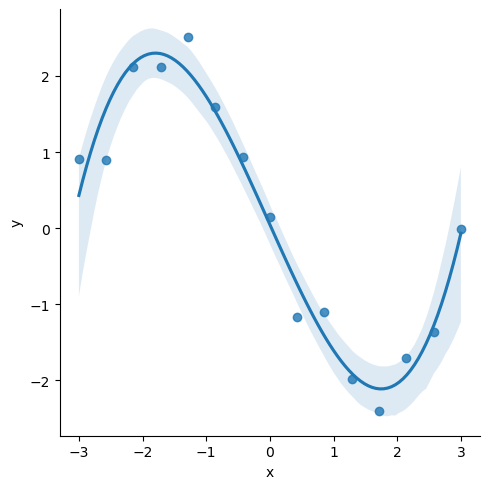

In [50]:
sns.lmplot( data=df_train, x='x', y='y', order=3)

plt.show()

But, we will revisit the question of which model is better... later